# Imports
Import python libraries

In [2]:
import os
import pandas as pd
import numpy as np
import cv2
import random

from tqdm import tqdm
from itertools import combinations, product

# Input and output directories
Where the sql database is and which folder the results are saved.

In [3]:
home = os.path.expanduser("~")

# SQL database path and name
input_dir = os.path.join(home, 'video_resources', 'sql_database')

# path to images
image_dir = os.path.join(home, 'video_resources','image_datasets')

# Where results are saved
output_dir = os.path.join(home, 'video_resources', 'experiment')

# Images to show

In [4]:

dif1 = 'xqlfw/Andrea_Yates/Andrea_Yates_0001.jpg'	
dif2 = 'xqlfw/Martha_Lucia_Ramirez/Martha_Lucia_Ramirez_0002.jpg'	
dif_value = 0.399817973

iden1 = dif1.split('/')[1]
iden2 = dif2.split('/')[1]


same1='xqlfw/George_W_Bush/George_W_Bush_0235.jpg'	
same2='xqlfw/George_W_Bush/George_W_Bush_0016.jpg'	
same_value = 0.000126897

iden_s = same1.split('/')[1]
	


# Get images and datafram with same identity pairs

In [5]:
imagenes = pd.read_pickle(os.path.join(output_dir,'imagenes.pkl'))
pd_same = pd.read_pickle(os.path.join(output_dir,'misma_identidad.pkl'))
pd_dif = pd.read_pickle(os.path.join(output_dir,'diferentes.pkl'))
imagenes_aleatorio = imagenes.sample(frac=1).reset_index(drop=True)

Defino la funcion de distancia o similitud

In [6]:
#hago la funcion coseno por hacer una
def similitud(a,b):
    a1 = np.array(a)
    b1 = np.array(b)

    return( np.dot(a1,b1)/(np.linalg.norm(a1)*np.linalg.norm(b1)))


In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy.stats import gaussian_kde

In [8]:


# Creas la gráfica de densidad
kde_same = gaussian_kde(pd_same.resultado)
kde_dif = gaussian_kde(pd_dif.resultado)

x_vals = np.linspace(min(pd_dif.resultado), 1, 1000)
same_vals = kde_same.evaluate(x_vals)
dif_vals = kde_dif.evaluate(x_vals)



In [9]:
# Cargamos la imagen

dif_img1 = mpimg.imread(os.path.join(image_dir,dif1))
dif_img2 = mpimg.imread(os.path.join(image_dir,dif2))


same_img1 = mpimg.imread(os.path.join(image_dir,same1))
same_img2 = mpimg.imread(os.path.join(image_dir,same2))


#img11 = cv2.cvtColor(img11, cv2.COLOR_BGR2RGB)
#img12 = cv2.cvtColor(img12, cv2.COLOR_RGB2BGR)

In [10]:
def unir_images(im1,im2):
    unida = np.zeros((im1.shape[0],im1.shape[1]+im2.shape[1],3), dtype=np.uint8)
    # Copiar la primera imagen a la izquierda
    unida[:, :im1.shape[1]] = im1
    # Copiar la segunda imagen a la derecha
    unida[:, im2.shape[1]:] = im2
    return(unida)


# plotear la grafica

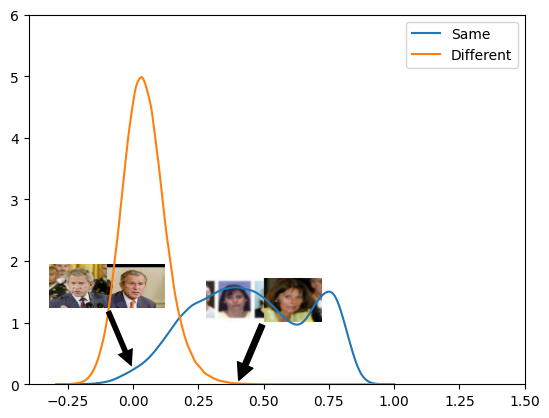

In [30]:
# unir imagenes
dif_img = unir_images(dif_img1,dif_img2)
same_img = unir_images(same_img1,same_img2)

# Decides las posiciones de las imagenes
x_dif = dif_value
y_dif = kde_dif.evaluate(x_dif)[0]

x_same = same_value
y_same = kde_same.evaluate(x_same)[0]


# primero dibujamos las curvas
ax =plt.plot(x_vals, same_vals,label = 'Same')
plt.plot(x_vals, dif_vals,label = 'Different')
plt.legend()


# Ajustamos el tamaño de la imagen para que se ajuste correctamente a la gráfica

# altura de las imagenes
alto = 0.7

# limites de los ejes y proporcion
plt.xlim(-0.4,1.5)
plt.ylim(0,6)
ratio = ax[0].axes.get_data_ratio()

#desplazamiento de las imagenes
x_off = 0.1
y_off = 1

imagen_dif = plt.imshow(dif_img, aspect='auto', extent=(x_dif-alto/ratio+x_off, x_dif+alto/ratio+x_off, y_dif + y_off, y_dif + y_off +alto))
# Añades una flecha que apunta desde el valor de y correspondiente hasta la imagen
plt.annotate('', xy=(x_dif, y_dif), xytext=(x_dif+x_off, y_dif + y_off), 
             arrowprops=dict(facecolor='black', shrink=0.05))


imagen_same = plt.imshow(same_img, aspect='auto', extent=(x_same-alto/ratio-x_off, x_same+alto/ratio-x_off, y_same + y_off, y_same + y_off +alto))
# Añades una flecha que apunta desde el valor de y correspondiente hasta la imagen
plt.annotate('', xy=(x_same, y_same), xytext=(x_same-x_off, y_same + y_off), 
             arrowprops=dict(facecolor='black', shrink=0.05, linewidth = 0.01))



plt.show()


# Ver parejas diferente identidad

In [12]:
diferente = pd.read_pickle(os.path.join(output_dir,'diferente_identidad.pkl'))

In [13]:
diferente = diferente.loc[diferente.resultado < 0.4]
diferente= diferente.sort_values('resultado', ascending = False)


In [14]:
for i,row in diferente.iterrows():
    im1 = mpimg.imread(os.path.join(image_dir,row.path1))
    im2 = mpimg.imread(os.path.join(image_dir,row.path2))
    cv2.imshow(str(row.resultado),cv2.cvtColor(unir_images(im1,im2), cv2.COLOR_BGR2RGB))
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    

# ver parejas misma identidad

In [13]:
mismo = pd.read_pickle(os.path.join(output_dir,'misma_identidad.pkl'))

In [15]:
mismo = mismo.loc[mismo.resultado > 0.0]
mismo= mismo.sort_values('resultado', ascending = True)


In [16]:
for i,row in mismo.iterrows():
    im1 = mpimg.imread(os.path.join(image_dir,row.path1))
    im2 = mpimg.imread(os.path.join(image_dir,row.path2))
    cv2.imshow(str(row.resultado),cv2.cvtColor(unir_images(im1,im2), cv2.COLOR_BGR2RGB))
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    